# Customer Churn Prediction Report

Import the data and inspect it using df.info()

In [1]:
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd

file_path = "data/churn.csv"
BASE_DIR = Path().resolve().parent
csv_path = BASE_DIR / file_path
df = pd.read_csv(csv_path)
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


It can be observed that TotalCharges should be of type float64. There are other numeric variables that are currently stored as object type. However, since they represent binary values, it is not necessary to convert them to floating-point numbers.

Therefore, I will now correct the data type of TotalCharges and perform another check to determine how many cells were successfully converted.

In [2]:
#missing values and #data types
col_str = df["TotalCharges"].astype(str)
numeric_converted = pd.to_numeric(col_str.str.strip(), errors="coerce")
df["TotalCharges"] = numeric_converted
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


It can be observed that TotalCharges now contains numeric values and includes 11 NaN cells. Since this number of missing entries is very small, these rows can be removed without significantly affecting the dataset.

Additionally, the customerID column will be dropped, as its information is not relevant to a customer’s decision regarding churn.

In [3]:
df = df.drop(columns=["customerID"])
df = df.dropna()

We will now proceed with encoding the categorical columns, as all features must be numeric to be used in a model. Binary columns will be encoded with values 0 and 1. Columns with multiple categories will be one-hot encoded, with one baseline category dropped, since the order of categories is not meaningful.

In [4]:
df["gender"] = df["gender"].map({"Female": 0, "Male": 1})
df["Partner"] = df["Partner"].map({"No": 0, "Yes": 1})
df["Dependents"] = df["Dependents"].map({"No": 0, "Yes": 1})
df["PhoneService"] = df["PhoneService"].map({"No": 0, "Yes": 1})

# Clean column (strip spaces, standardize capitalization)
df["MultipleLines"] = df["MultipleLines"].str.strip().str.title()
df["MultipleLines"] = df["MultipleLines"].map({"No": 0, "Yes": 1, "No Phone Service": 0})

# One-hot encode example (drop one baseline category)
df["InternetService"] = df["InternetService"].str.strip().str.title()
df = pd.get_dummies(df, columns=["InternetService"], drop_first=True, dtype=int)

df["OnlineSecurity"] = df["OnlineSecurity"].str.strip().str.title()
df["OnlineSecurity"] = df["OnlineSecurity"].map({"No": 0, "Yes": 1, "No Internet Service": 0})

df["OnlineBackup"] = df["OnlineBackup"].str.strip().str.title()
df["OnlineBackup"] = df["OnlineBackup"].map({"No": 0, "Yes": 1, "No Internet Service": 0})

df["DeviceProtection"] = df["DeviceProtection"].str.strip().str.title()
df["DeviceProtection"] = df["DeviceProtection"].map({"No": 0, "Yes": 1, "No Internet Service": 0})

df["TechSupport"] = df["TechSupport"].str.strip().str.title()
df["TechSupport"] = df["TechSupport"].map({"No": 0, "Yes": 1, "No Internet Service": 0})

df["StreamingTV"] = df["StreamingTV"].str.strip().str.title()
df["StreamingTV"] = df["StreamingTV"].map({"No": 0, "Yes": 1, "No Internet Service": 0})

df["StreamingMovies"] = df["StreamingMovies"].str.strip().str.title()
df["StreamingMovies"] = df["StreamingMovies"].map({"No": 0, "Yes": 1, "No Internet Service": 0})


df["Contract"] = df["Contract"].str.strip().str.title()
df = pd.get_dummies(df, columns=["Contract"], drop_first=True, dtype=int)

df["PaperlessBilling"] = df["PaperlessBilling"].map({"No": 0, "Yes": 1})

df["PaymentMethod"] = df["PaymentMethod"].str.strip().str.title()
df = pd.get_dummies(df, columns=["PaymentMethod"], drop_first=True, dtype=int)

df["Churn"] = df["Churn"].map({"No": 0, "Yes": 1})

df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7032 non-null   int64  
 1   SeniorCitizen                          7032 non-null   int64  
 2   Partner                                7032 non-null   int64  
 3   Dependents                             7032 non-null   int64  
 4   tenure                                 7032 non-null   int64  
 5   PhoneService                           7032 non-null   int64  
 6   MultipleLines                          7032 non-null   int64  
 7   OnlineSecurity                         7032 non-null   int64  
 8   OnlineBackup                           7032 non-null   int64  
 9   DeviceProtection                       7032 non-null   int64  
 10  TechSupport                            7032 non-null   int64  
 11  Streaming

It can be verified that there are no null values and that all columns now have numeric data types. Before proceeding to model training, it is important to check whether the dataset is balanced.

In [5]:
#check class inbalance
count_yes = 0
count_no = 0

for churn in df["Churn"]:
    if churn == 1:
        count_yes+=1
    else:
        count_no+=1

print(count_yes*100 /(count_no+count_yes))

26.57849829351536


The value is 26.58%, indicating that the dataset is unbalanced, which is common in churn data. Consequently, accuracy will not be the most appropriate metric for evaluating the models.

Finally, we split the dataset. Since there are three numeric columns with different ranges of values, it is necessary to scale them.

In [6]:
# Spliting train and test
y = df["Churn"]

# Features (drop the target column)
X = df.drop(columns=["Churn"])

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Only scale numeric columns
numerical_cols = ["tenure", "MonthlyCharges", "TotalCharges"]
scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

Below is the complete function, which can be reused later.

In [7]:
def preprocessing(file_path):
    BASE_DIR = Path().resolve().parent
    csv_path = BASE_DIR / file_path
    df = pd.read_csv(csv_path)

    #missing values and #data types
    col_str = df["TotalCharges"].astype(str)
    numeric_converted = pd.to_numeric(col_str.str.strip(), errors="coerce")
    df["TotalCharges"] = numeric_converted

    #drop id column
    df = df.drop(columns=["customerID"])

    #delete lines due to TotalCharges attribute fixing 
    df = df.dropna()

    #encoding columns
    df["gender"] = df["gender"].map({"Female": 0, "Male": 1})
    df["Partner"] = df["Partner"].map({"No": 0, "Yes": 1})
    df["Dependents"] = df["Dependents"].map({"No": 0, "Yes": 1})
    df["PhoneService"] = df["PhoneService"].map({"No": 0, "Yes": 1})

    df["MultipleLines"] = df["MultipleLines"].str.strip().str.title()
    df["MultipleLines"] = df["MultipleLines"].map({"No": 0, "Yes": 1, "No Phone Service": 0})

    df["InternetService"] = df["InternetService"].str.strip().str.title()
    df = pd.get_dummies(df, columns=["InternetService"], drop_first=True, dtype=int)

    df["OnlineSecurity"] = df["OnlineSecurity"].str.strip().str.title()
    df["OnlineSecurity"] = df["OnlineSecurity"].map({"No": 0, "Yes": 1, "No Internet Service": 0})

    df["OnlineBackup"] = df["OnlineBackup"].str.strip().str.title()
    df["OnlineBackup"] = df["OnlineBackup"].map({"No": 0, "Yes": 1, "No Internet Service": 0})

    df["DeviceProtection"] = df["DeviceProtection"].str.strip().str.title()
    df["DeviceProtection"] = df["DeviceProtection"].map({"No": 0, "Yes": 1, "No Internet Service": 0})

    df["TechSupport"] = df["TechSupport"].str.strip().str.title()
    df["TechSupport"] = df["TechSupport"].map({"No": 0, "Yes": 1, "No Internet Service": 0})

    df["StreamingTV"] = df["StreamingTV"].str.strip().str.title()
    df["StreamingTV"] = df["StreamingTV"].map({"No": 0, "Yes": 1, "No Internet Service": 0})

    df["StreamingMovies"] = df["StreamingMovies"].str.strip().str.title()
    df["StreamingMovies"] = df["StreamingMovies"].map({"No": 0, "Yes": 1, "No Internet Service": 0})


    df["Contract"] = df["Contract"].str.strip().str.title()
    df = pd.get_dummies(df, columns=["Contract"], drop_first=True, dtype=int)

    df["PaperlessBilling"] = df["PaperlessBilling"].map({"No": 0, "Yes": 1})

    df["PaymentMethod"] = df["PaymentMethod"].str.strip().str.title()
    df = pd.get_dummies(df, columns=["PaymentMethod"], drop_first=True, dtype=int)

    df["Churn"] = df["Churn"].map({"No": 0, "Yes": 1})

    # Spliting train and test
    y = df["Churn"]  
    
    # Features (drop the target column)
    X = df.drop(columns=["Churn"])

    X_train, X_test, y_train, y_test = train_test_split(
        X, y,
        test_size=0.2,
        random_state=42,
        stratify=y
    )

    # Only scale numeric columns
    numerical_cols = ["tenure", "MonthlyCharges", "TotalCharges"]
    scaler = StandardScaler()
    X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
    X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

    return X_train, X_test, y_train, y_test

The following code section contains the functions that fit the model after the data has been processed.

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

def train_model_log_regression(log_reg):
    file_path = "data/churn.csv"

    X_train, X_test, y_train, y_test = preprocessing(file_path)

    return log_reg.fit(X_train, y_train), X_train, X_test, y_train, y_test

def train_model_rand_forest(rand_forest):
    file_path = "data/churn.csv"

    X_train, X_test, y_train, y_test = preprocessing(file_path)

    return rand_forest.fit(X_train, y_train), X_train, X_test, y_train, y_test

def train_model_grad_boost(gb_model):
    file_path = "data/churn.csv"

    X_train, X_test, y_train, y_test = preprocessing(file_path)

    return gb_model.fit(X_train, y_train), X_train, X_test, y_train, y_test


This code section defines the function used to evaluate the models.

In [9]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix,roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

def evaluate_model(trained_model, X_train, X_test, y_train, y_test):

    y_pred = trained_model.predict(X_test)
    y_train_pred = trained_model.predict(X_train)

    # Cross-Validation
    cv_scores = cross_val_score(
        trained_model,
        X_train,
        y_train,
        cv=5,
        scoring="roc_auc"
    )

    print("\n--- Cross Validation (5-Fold) ---")
    print("CV ROC-AUC scores:", cv_scores)
    print("Mean CV ROC-AUC :", cv_scores.mean())
    print("Std CV ROC-AUC  :", cv_scores.std())

    # metrics
    # Test Confusion matrix Accuracy, precision, recall, F1
    print("\nTest Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Test Accuracy :", accuracy_score(y_test, y_pred))
    print("Test Precision:", precision_score(y_test, y_pred))
    print("Test Recall   :", recall_score(y_test, y_pred))
    print("Test F1 Score :", f1_score(y_test, y_pred))

    # Train Confusion matrix Accuracy, precision, recall, F1
    print("\nTrain Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred))
    print("Train Accuracy :", accuracy_score(y_train, y_train_pred))
    print("Train Precision:", precision_score(y_train, y_train_pred))
    print("Train Recall   :", recall_score(y_train, y_train_pred))
    print("Train F1 Score :", f1_score(y_train, y_train_pred))

    # ROC-AUC# Predict probabilities
    y_prob = trained_model.predict_proba(X_test)[:, 1]
    y_train_prob = trained_model.predict_proba(X_train)[:, 1]

    # ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_prob)

    # AUC score
    auc_score = roc_auc_score(y_test, y_prob)
    auc_score_train = roc_auc_score(y_train, y_train_prob)
    print("Test ROC-AUC Score:", auc_score)
    print("Train ROC-AUC Score:", auc_score_train)

    # Plot
    plt.figure()
    plt.plot(fpr, tpr, label="Test Model")
    plt.plot([0, 1], [0, 1], linestyle="--")
    plt.plot(fpr_train, tpr_train, label="Train Model")
    plt.plot([0, 1], [0, 1], linestyle="--", color="g")

    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Train vs Test ROC Curve")
    plt.legend()
    plt.show()

## The Confusion Matrix 

TP = True Positives > predicted churn, actually churn;
TN = True Negatives > predicted not churn, actually not churn;
FP = False Positives > predicted churn, but they didn’t churn (false alarm);
FN = False Negatives > predicted not churn, but they churned (missed customer);

## Accuracy

Accuracy indicates how often the model’s predictions are correct. For example, if the model predicts correctly 90 times out of 100, the accuracy is 90%.
However, accuracy can be misleading when the dataset is imbalanced. For instance, in a churn dataset where 75% of customers do not churn, a model that always predicts “No churn” would achieve 75% accuracy, despite failing to identify any churn cases. Therefore, accuracy is a reliable metric only when the classes are balanced.

## Precision

Precision measures how often the model is correct when it predicts a positive outcome, such as “churn.” High precision indicates few false positives, which is important in a business context. If we target customers predicted to churn, precision tells us how many truly need attention. This is particularly valuable when false positives are costly. For example, providing discounts to customers who would not have churned results in unnecessary expenses.

## Recall (Sensitivity)

Recall measures the proportion of actual churners that the model correctly identifies. High recall means that very few churners are missed. In a business context, recall is important when false negatives are costly. Missing a churner could result in losing a customer. Precision ensures we don’t waste effort, while recall ensures we don’t miss anyone.

## F1 Score

The F1 score represents the balance between precision and recall and is high only when both metrics are high. It is particularly useful when the dataset is imbalanced and a single, reliable metric is desired making it well-suited for churn prediction.

## Test vs. Train Metrics

To evaluate model performance, we compute metrics such as accuracy, precision, recall, F1 score, and ROC-AUC on both the training and test sets.
If the training metrics are significantly higher than the test metrics, the model is overfitting. If both training and test metrics are similar but low, the model is underfitting.

## Cross-validation

Cross-validation helps detect overfitting or underfitting by showing how performance varies across different subsets of the data. It also ensures that the model’s performance is not dependent on a single train/test split.

In [10]:
# Create the models
log_reg_model = LogisticRegression(max_iter=1000)

rf_model = RandomForestClassifier(
    n_estimators=200,     # number of trees
    max_depth=None,      # allow full depth
    random_state=42,
    class_weight="balanced"  # useful for churn imbalance
)

rf_model_tuned = RandomForestClassifier(
    n_estimators=200,
    max_depth=8,
    min_samples_leaf=10,
    random_state=42,
    class_weight="balanced"
)

gb_model = GradientBoostingClassifier(
    n_estimators=300,        
    learning_rate=0.05,      # slower learning, less overfit
    max_depth=4,             # shallow trees, prevent overfitting
    min_samples_leaf=15,     # avoid tiny leaves
    subsample=0.8,           # row sampling to reduce variance
    max_features="sqrt",     # feature sampling
    random_state=42
)

Train the models

In [11]:
#train the models
trained_log_reg, X_train_log_reg, X_test_log_reg, y_train_log_reg, y_test_log_reg = train_model_log_regression(log_reg_model)
trained_rf, X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_model_rand_forest(rf_model)
trained_rf_tuned, X_train_rf_tuned, X_test_rf_tuned, y_train_rf_tuned, y_test_rf_tuned = train_model_rand_forest(rf_model_tuned)
trained_gb, X_train_gb, X_test_gb, y_train_gb, y_test_gb = train_model_grad_boost(gb_model)

Evaluate the models


--- Cross Validation (5-Fold) ---
CV ROC-AUC scores: [0.83656782 0.87373975 0.84085369 0.8191834  0.85891227]
Mean CV ROC-AUC : 0.8458513851660499
Std CV ROC-AUC  : 0.018818558431409324

Test Confusion Matrix:
 [[918 115]
 [162 212]]
Test Accuracy : 0.8031272210376688
Test Precision: 0.6483180428134556
Test Recall   : 0.5668449197860963
Test F1 Score : 0.6048502139800286

Train Confusion Matrix:
 [[3704  426]
 [ 674  821]]
Train Accuracy : 0.8044444444444444
Train Precision: 0.6583801122694467
Train Recall   : 0.5491638795986622
Train F1 Score : 0.5988329686360321
Test ROC-AUC Score: 0.8362060040068127
Train ROC-AUC Score: 0.850489363252812


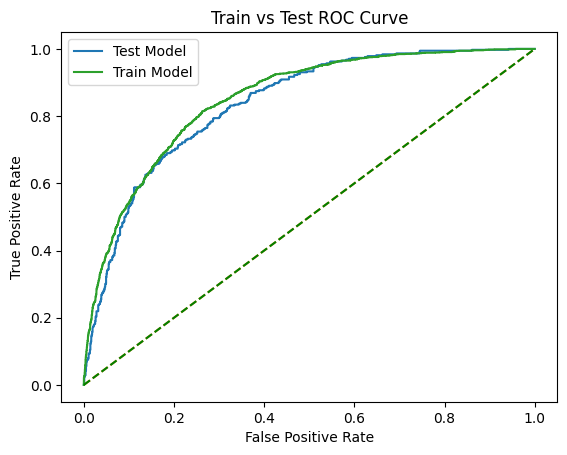

In [12]:
evaluate_model(trained_log_reg, X_train_log_reg, X_test_log_reg, y_train_log_reg, y_test_log_reg)

## Logistic Regression Analysis

The mean cross-validation score (0.846) is very close to the training ROC-AUC (0.850) and test ROC-AUC (0.836). The small standard deviation (~ 0.019) indicates that the model’s performance is stable across folds. This confirms that the train/test split was representative and that the model generalizes reasonably well to unseen data.

Because churn is an imbalanced classification problem, accuracy alone is not sufficient to evaluate the model. Precision, recall, and F1-score provide a better view of churn detection performance.

The logistic regression baseline achieves moderate precision (~ 0.65) and recall (~ 0.57), meaning it identifies more than half of churners but still misses a significant portion.

ROC-AUC scores are strong (0.84–0.85), indicating the model separates churn and non-churn customers reasonably well, and performance could improve through threshold tuning or more powerful models.

Train and test scores are very similar, suggesting the model generalizes well and is not overfitting, but overall performance is limited, so more complex models may capture additional patterns.


--- Cross Validation (5-Fold) ---
CV ROC-AUC scores: [0.82381141 0.84254213 0.82917838 0.79988379 0.83502717]
Mean CV ROC-AUC : 0.8260885761254222
Std CV ROC-AUC  : 0.01450545302029285

Test Confusion Matrix:
 [[925 108]
 [189 185]]
Test Accuracy : 0.7889125799573561
Test Precision: 0.6313993174061433
Test Recall   : 0.4946524064171123
Test F1 Score : 0.5547226386806596

Train Confusion Matrix:
 [[4127    3]
 [   4 1491]]
Train Accuracy : 0.9987555555555555
Train Precision: 0.9979919678714859
Train Recall   : 0.9973244147157191
Train F1 Score : 0.9976580796252927
Test ROC-AUC Score: 0.8201101614631596
Train ROC-AUC Score: 0.9999195056969559


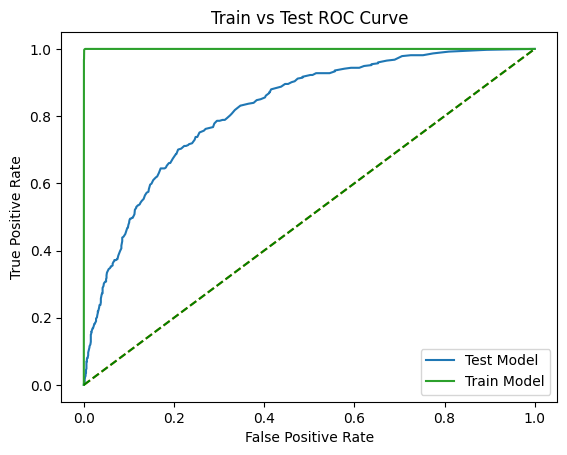

In [13]:
evaluate_model(trained_rf, X_train_rf, X_test_rf, y_train_rf, y_test_rf)

## Random Forest Analysis

This model achieves near-perfect performance on the training set, but significantly worse performance on the test set. This large train–test gap indicates severe overfitting. The model is likely memorizing training patterns due to unrestricted tree depth. To improve generalization, hyperparameters such as max_depth, min_samples_leaf, and max_features should be tuned.


--- Cross Validation (5-Fold) ---
CV ROC-AUC scores: [0.83947905 0.87193389 0.85220914 0.82138606 0.85231036]
Mean CV ROC-AUC : 0.8474637006324552
Std CV ROC-AUC  : 0.01666491812653198

Test Confusion Matrix:
 [[753 280]
 [ 77 297]]
Test Accuracy : 0.746268656716418
Test Precision: 0.5147313691507799
Test Recall   : 0.7941176470588235
Test F1 Score : 0.6246056782334385

Train Confusion Matrix:
 [[3188  942]
 [ 243 1252]]
Train Accuracy : 0.7893333333333333
Train Precision: 0.5706472196900638
Train Recall   : 0.8374581939799332
Train F1 Score : 0.6787747357007319
Test ROC-AUC Score: 0.8411808708346491
Train ROC-AUC Score: 0.8866479062573388


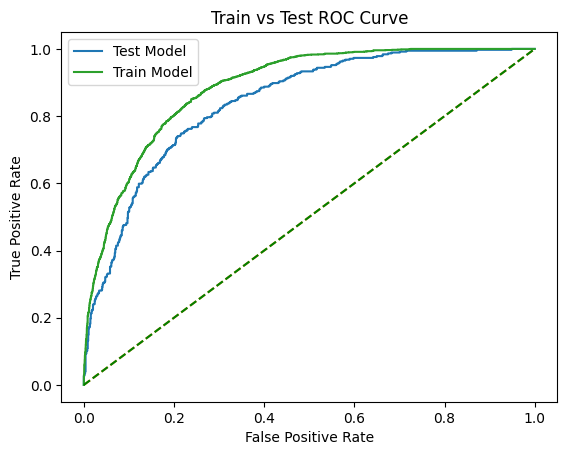

In [14]:
evaluate_model(trained_rf_tuned, X_train_rf_tuned, X_test_rf_tuned, y_train_rf_tuned, y_test_rf_tuned)

## Tuned Random Forest Analysis

After limiting tree depth and increasing minimum leaf size, the Random Forest generalizes much better than the unconstrained version. Train and test ROC-AUC scores are now close, indicating reduced overfitting.

Compared to logistic regression, the tuned model achieves significantly higher recall, meaning it detects more churn customers, at the cost of lower precision. Overall, the model provides a stronger churn-sensitive classifier, and threshold tuning could further balance false positives vs false negatives.


--- Cross Validation (5-Fold) ---
CV ROC-AUC scores: [0.8335837  0.86650012 0.8506199  0.82058638 0.85237312]
Mean CV ROC-AUC : 0.8447326439220323
Std CV ROC-AUC  : 0.015963714250696735

Test Confusion Matrix:
 [[914 119]
 [175 199]]
Test Accuracy : 0.7910447761194029
Test Precision: 0.6257861635220126
Test Recall   : 0.5320855614973262
Test F1 Score : 0.5751445086705202

Train Confusion Matrix:
 [[3832  298]
 [ 595  900]]
Train Accuracy : 0.8412444444444445
Train Precision: 0.7512520868113522
Train Recall   : 0.6020066889632107
Train F1 Score : 0.6683995544002971
Test ROC-AUC Score: 0.8344290809697108
Train ROC-AUC Score: 0.897049325030165


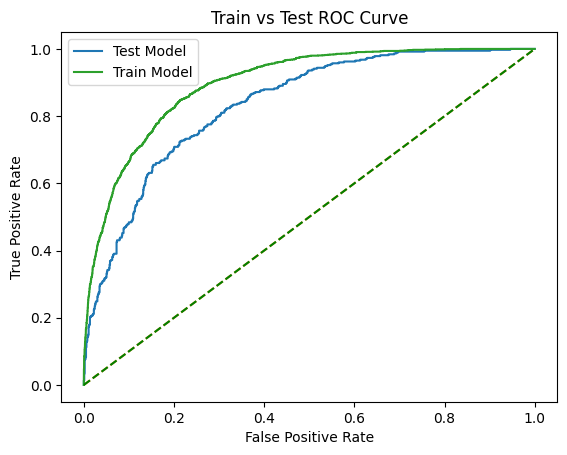

In [15]:
evaluate_model(trained_gb, X_train_gb, X_test_gb, y_train_gb, y_test_gb)

## Gradient Boosting Analysis

The training performance is strong, but the test performance drops (F1 = 0.58, ROC-AUC = 0.84), indicating some overfitting.

Cross-validation remains consistent, suggesting that the model generalizes reasonably well across folds. However, compared to a tuned Random Forest, this configuration does not improve recall, which is critical for churn detection.

This highlights the need for hyperparameter tuning such as learning rate, max_depth, n_estimators, subsample, and class_weight—to enhance generalization. Gradient boosting is a powerful model, but incorrect settings can lead to overfitting and may perform worse than a well-tuned Random Forest. Proper feature engineering and hyperparameter optimization are essential for improving performance.